Importing All The Python libraries Which Are Going To Be Used In This Projecet

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

Data Collection and Analysis

PIMA Diabetes Dataset

In [211]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_data=pd.read_csv("/content/drive/MyDrive/DATA SET/diabetes.csv")

In [212]:
#Printing The 5 Row's of dataset from the head side
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [213]:
#Printing The 5 Row's of dataset from the tail side
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [214]:
#Printing the total numbers of rows and columns in this dataset
diabetes_data.shape

(768, 9)

In [215]:
#Getting info about the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [216]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [217]:
#Getting Statistical measures of the given dataset
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data visualization

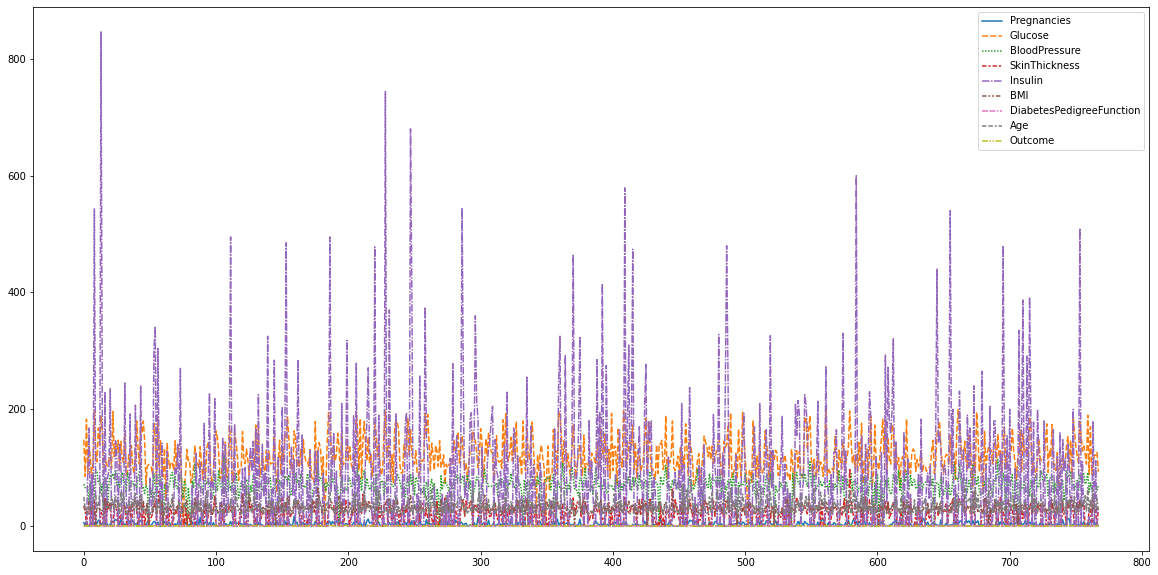

In [218]:
plt.figure(figsize=(20,10))
sns.lineplot(data=diabetes_data)

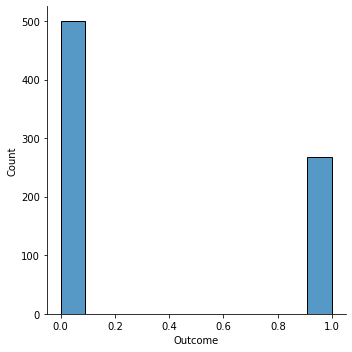

In [219]:
#outcome distribution 
sns.displot(data=diabetes_data,x='Outcome')

1--> BloodPressure VS Outcome

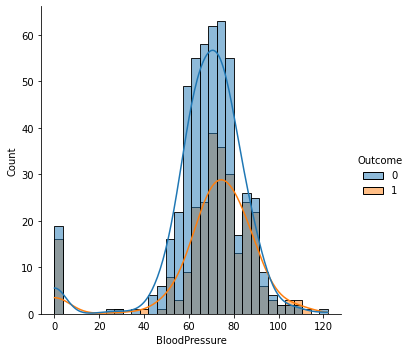

In [220]:
sns.displot(data=diabetes_data,x="BloodPressure",hue="Outcome",kde=True)

Blood preesure for diabetics are high

2--> Glucose VS Outcome

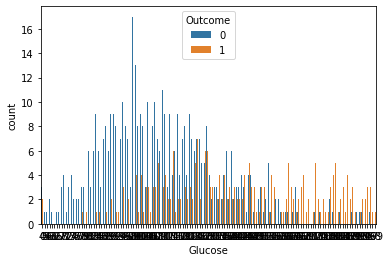

In [221]:
sns.countplot(data=diabetes_data,x='Glucose',hue='Outcome')

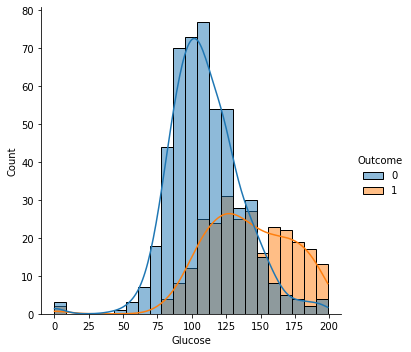

In [222]:
sns.displot(data=diabetes_data,x="Glucose",hue="Outcome",kde=True)

Glucose of diabetics are also high

3--> Pregnencies vs Outcome

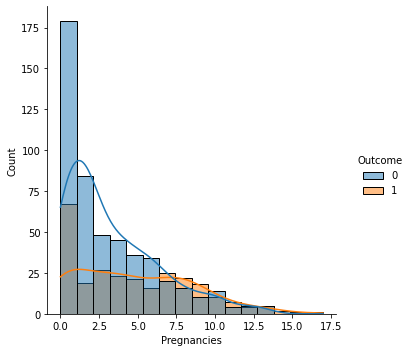

In [223]:
sns.displot(data=diabetes_data,x="Pregnancies",hue="Outcome",kde=True)

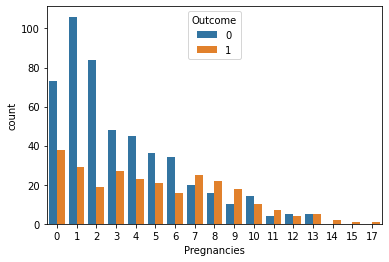

In [224]:
sns.countplot(data=diabetes_data,x='Pregnancies',hue='Outcome')

4--> SkinThickness VS Outcome

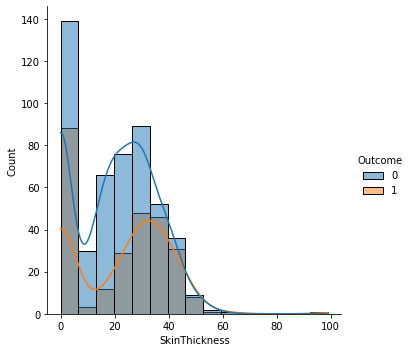

In [225]:
sns.displot(data=diabetes_data,x="SkinThickness",hue="Outcome",kde=True)

5--> Insulin vs Outcome

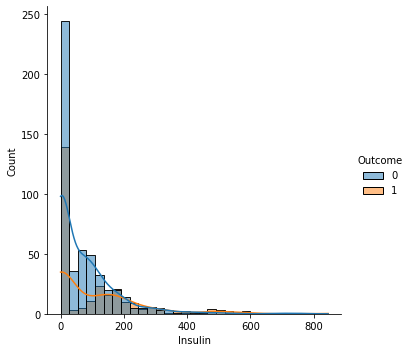

In [226]:
sns.displot(data=diabetes_data,x="Insulin",hue="Outcome",kde=True)

6--> Age VS outcome

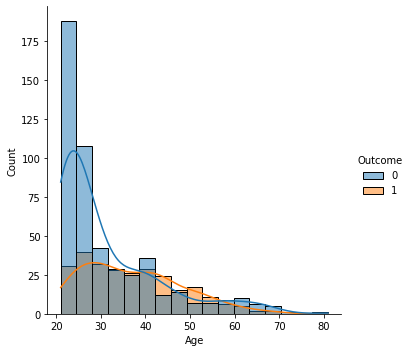

In [227]:
sns.displot(data=diabetes_data,x="Age",hue="Outcome",kde=True)

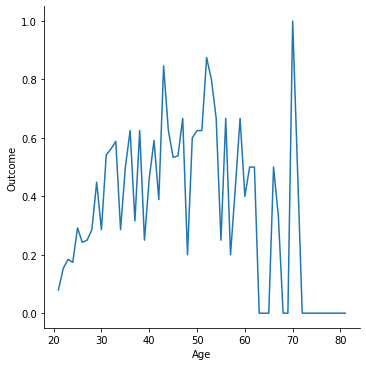

In [228]:
sns.relplot("Age","Outcome",data=diabetes_data,kind="line",ci=None)

7--> BMI VS Outcome

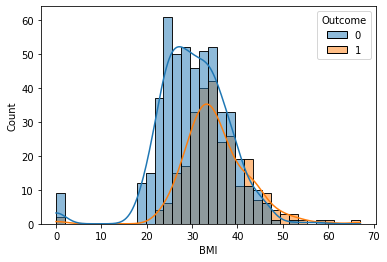

In [229]:
sns.histplot(data=diabetes_data,x='BMI',hue='Outcome',kde=True)

8--> DiabetesPedigreeFunction VS outcome

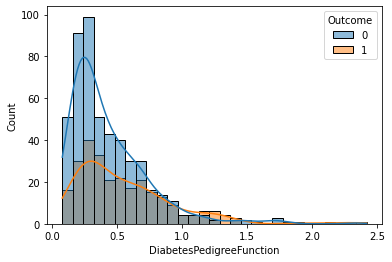

In [230]:
sns.histplot(x="DiabetesPedigreeFunction", hue="Outcome", data=diabetes_data, kde=True)

Pairplot

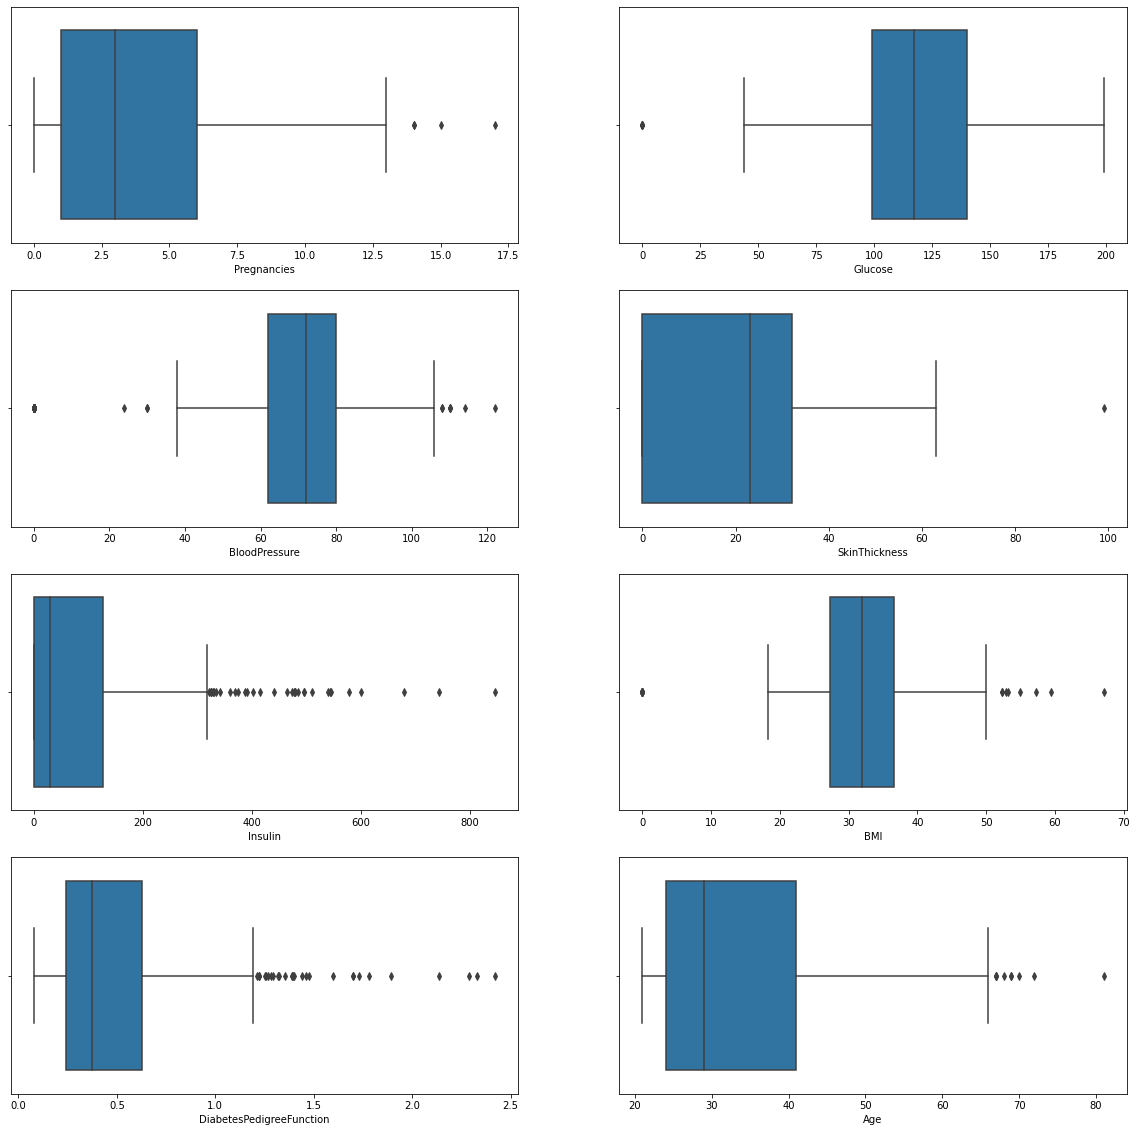

In [231]:
fig, axs = plt.subplots(4, 2, figsize=(20,20))
axs = axs.flatten()
for i in range(len(diabetes_data.columns)-1):
    sns.boxplot(data=diabetes_data, x=diabetes_data.columns[i], ax=axs[i])

Correlation matrix

Text(0.5, 1.0, 'Correlation Map')

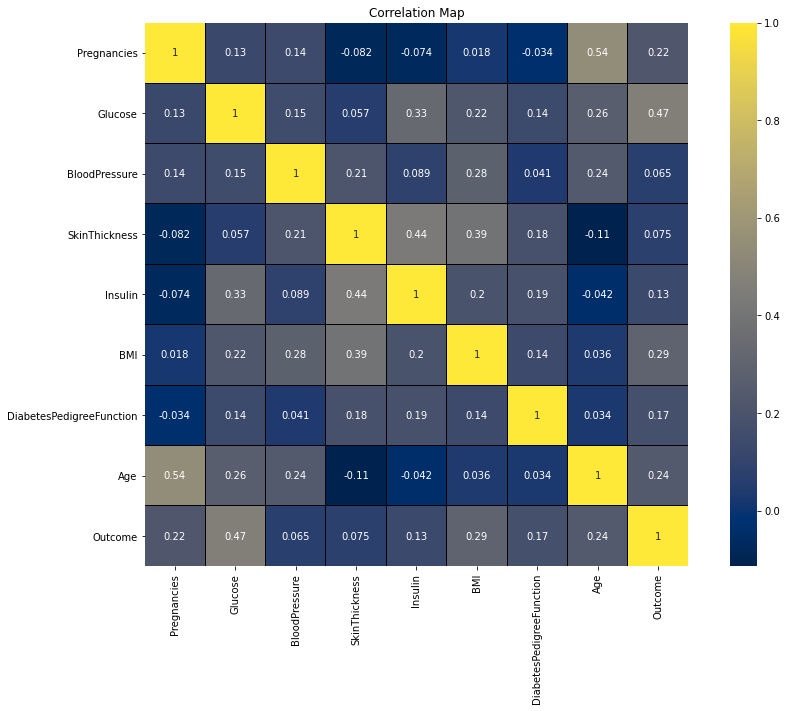

In [232]:
plt.subplots(figsize=(15,10))
sns.heatmap(diabetes_data.corr(),linewidth=0.1,vmax=1.0,square=True,cmap='cividis',annot=True,linecolor='black').set_title("Correlation Map")

0--> Non Diabetic

1--> Diabetic

**Train Test Split**

In [233]:
x = diabetes_data.iloc[:,:-1].values
y = diabetes_data.iloc[:,-1].values

In [234]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [235]:
#Printing Shape of  train and test
print('X Train Shape',x_train.shape)
print('Y Train Shape',y_train.shape)
print('X Test Shape',x_test.shape)
print('Y Test Shape',y_test.shape)

X Train Shape (614, 8)
Y Train Shape (614,)
X Test Shape (154, 8)
Y Test Shape (154,)


**GridSearchCV**

In [236]:
models_list = [(LogisticRegression(),[{'dual':[False],'max_iter':[100,150,200,250,300],'C':[0.25,0.5,0.75,1,1.5,2.0],'random_state':[0]}]),
             (KNeighborsClassifier(),[{'n_neighbors':[5,10,6,7]}]),
             (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear'],'random_state':[0]},{'C':[0.25,0.5,0.75,1],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'random_state':[0]}]),
             (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
             (RandomForestClassifier(),[{'n_estimators':[10,100,50,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [237]:
from sklearn.model_selection import GridSearchCV

In [209]:
for i,j in models_list:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train,y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('Best Parameters : ',best_param)

Best Parameters :  {'C': 1.5, 'dual': False, 'max_iter': 100, 'random_state': 0}
Best Parameters :  {'n_neighbors': 10}
Best Parameters :  {'C': 0.25, 'kernel': 'linear', 'random_state': 0}
Best Parameters :  {'criterion': 'gini', 'random_state': 0}
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 200, 'random_state': 0}


**Training Model**


**Logistic Regression**

In [238]:
from sklearn.metrics import confusion_matrix , accuracy_score
lr = LogisticRegression(C= 1.5, dual= False, max_iter= 100, random_state= 0)
lr.fit(x_train,y_train)
lrtest = lr.predict(x_test)
ascore = accuracy_score(y_test,lrtest)
print('Accuracy of Logistic Regression : {:.2f}%'.format(ascore*100))

Accuracy of Logistic Regression : 82.47%


**KNN**

In [239]:
knn = KNeighborsClassifier(n_neighbors= 10)
knn.fit(x_train,y_train)
knntest = knn.predict(x_test)
knnscore = accuracy_score(y_test,knntest)
print('Accuracy of KNN : {:.2f}%'.format(knnscore*100))

Accuracy of KNN : 79.22%


**Decision Tree Classifier**

In [240]:
dct = DecisionTreeClassifier(criterion='gini', random_state= 0)
dct.fit(x_train,y_train)
dcttest = dct.predict(x_test)
dctscore = accuracy_score(y_test,dcttest)
print('Accuracy of Decision Tree : {:.2f}%'.format(dctscore*100))

Accuracy of Decision Tree : 76.62%


**SVM**

In [241]:
svc = SVC(C=0.25, kernel='linear', random_state= 0)
svc.fit(x_train,y_train)
svctest = svc.predict(x_test)
svcscore = accuracy_score(y_test,svctest)
print('Accuracy of SVM : {:.2f}%'.format(svcscore*100))

Accuracy of SVM : 82.47%


**Random Forest Classifier**

In [242]:
rfc = RandomForestClassifier(criterion= 'entropy', n_estimators=200, random_state= 0)
rfc.fit(x_train,y_train)
rfctest = rfc.predict(x_test)
rfcscore = accuracy_score(y_test,rfctest)
print('Accuracy of Random Forest : {:.2f}%'.format(rfcscore*100))

Accuracy of Random Forest : 81.17%


In [247]:
#Adding all model Accuracy in a List
l = []
l.append(lr)
l.append(knn)
l.append(dct)
l.append(svc)
l.append(rfc)

In [248]:
for i in l:
    i.fit(x_train,y_train)
    pr = i.predict(x_test)
    a = accuracy_score(y_test,pr)
    print('Accuracy :{:.2f}%'.format(a*100))

Accuracy :82.47%
Accuracy :79.22%
Accuracy :76.62%
Accuracy :82.47%
Accuracy :81.17%


**Making a Predictive System**

In [260]:
input_data = (0,95,85,25,36,37.4,0.247,24)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svc_model.predict(x_test)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic


**Save Model**

In [261]:
import pickle
pickle.dump(svc, open('SVC_diabetes.pkl', 'wb'))

In [262]:
from sklearn.externals import joblib
 
# Save the model as a pickle in a file
joblib.dump(knn, 'Svc_model.pkl')
 
# Load the model from the file
svc_model = joblib.load('Svc_model.pkl')
 
# Use the loaded model to make predictions
svc_model.predict(x_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])